# Bike-sharing Example

Simulation of the homogeneous model of https://arxiv.org/pdf/1201.1178.pdf (Section 2)

In [1]:
# To load the library
import rmftool as rmf

# To plot the results
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# This code creates an object that represents a "density dependent population process"
ddpp = rmf.DDPP()
K = 10 
s=7
mu=1
lam=1

# The vector 'e(i)' is a vector where the $i$th coordinate is equal to $1$ (the other being equal to $0$)
def e(i):
    l = np.zeros(K+1)
    l[i] = 1
    return(l)

# We then add the transitions : 
for i in range(1,K+1):
    ddpp.add_transition(-e(i)+e(i-1),eval('lambda x: lam*x[{}]'.format(i) ))
    ddpp.add_transition(e(i)-e(i-1),eval('lambda x: mu*x[{}]*(s- np.sum([j*x[j] for j in range(K+1)]))'.format(i-1) ))
ddpp.set_initial_state(e(s))

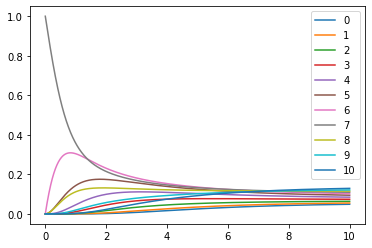

In [3]:
T,X=ddpp.ode(time=10)
plt.plot(T,X)
plt.legend(['{}'.format(i) for i in range(K+1)])

0.07064348633718813

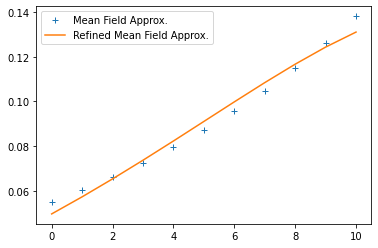

In [4]:
s=7
pi,V,W=ddpp.meanFieldExpansionSteadyState(order=1)
plt.plot(range(K+1),pi,'+')
plt.plot(pi+V/10)
plt.legend(("Mean Field Approx.","Refined Mean Field Approx."))
max(abs(V))

0.06386175807663402

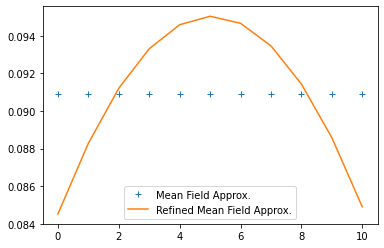

In [5]:
s=6
pi,V,W=ddpp.meanFieldExpansionSteadyState(order=1)
plt.plot(range(K+1),pi,'+')
plt.plot(pi+V/10)
plt.legend(("Mean Field Approx.","Refined Mean Field Approx."))
max(abs(V))

0.08500187953527731

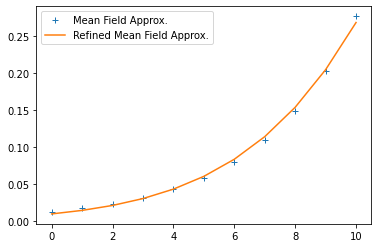

In [6]:
s=9
pi,V,W=ddpp.meanFieldExpansionSteadyState(order=1)
plt.plot(range(K+1),pi,'+')
plt.plot(pi+V/10)
plt.legend(("Mean Field Approx.","Refined Mean Field Approx."))
max(abs(V))

In [7]:
V/pi

array([-2.45517316, -1.63099948, -0.94224151, -0.38889924,  0.02902733,
        0.31153818,  0.45863333,  0.47031277,  0.34657651,  0.08742454,
       -0.30714314])